# Módulo 8 Sprint

## Tema

*Fundamentos del Big Data*

## Objetivo del proyecto (Competencias del módulo)

**Elaborar un modelo predictivo utilizando grandes volúmenes de datos para resolver un problema**

## Descripción del ejercicio

**Clasificación y Clasterización**

**Suponemos que el conjunto de datos se genera a partir de diferentes distribuciones multivariantes gaussianas.  Adjunto usted encontrará un documento .ipynb, donde encontrará los datos que debe trabajar.**


In [171]:
import warnings
warnings.filterwarnings('ignore')

### Plots
%matplotlib inline
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
bounds = np.linspace(-1, 3, 10)
normcolor = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
##########
from scipy.stats import multivariate_normal as mvnorm
from scipy.stats import norm

**Primero fijamos los valores medios y las matrices de covarianza correspondientes a cada clase, así como sus etiquetas. Actualmente se seleccionan tres valores medios para el conjunto de datos.**

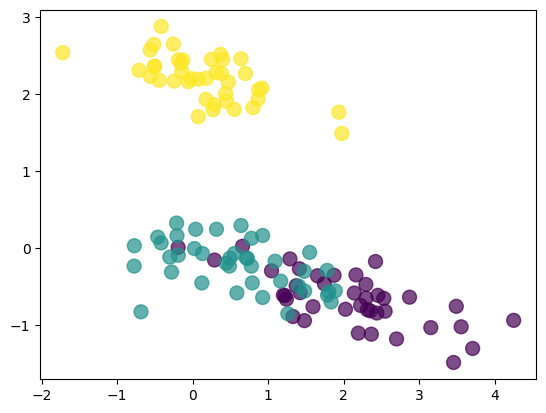

In [172]:
# Ambient dimension
p=2
# Number of elements in each class
n1=40 
n2=40
n3=40
#### Labels
etiquetas=np.concatenate((0*np.ones(n1,),1*np.ones(n2,),2*np.ones(n3,)),
                     axis=0)[np.newaxis]
#### Mean values
# Either random
m1=norm.rvs(0,1,size=(p,))
m2=norm.rvs(0,1,size=(p,))
m3=norm.rvs(0,1,size=(p,))
# Or fixed
#m1= [1,2]
#m2=[-2,-1]
#m3=[-2,3]
#### Covariance matrix
temp= norm.rvs(0, 0.5, size=(p, p))
Sigma1 =  temp.T@temp
Sigma2 = Sigma1
Sigma3 = Sigma1
#### Generate data
X1=mvnorm.rvs(m1, Sigma1, size=(n1, 1))
X2=mvnorm.rvs(m2, Sigma2, size=(n2, 1))
X3=mvnorm.rvs(m3, Sigma3, size=(n3, 1))
#### Build the dataset
X=np.concatenate((X1,X2,X3),axis=0)
Xlabeled=np.concatenate((X,etiquetas.T),axis=1)
xbar1=np.mean(X1,0)
xbar2=np.mean(X2,0)
xbar3=np.mean(X3,0)
xmean1=(xbar1+xbar2)/2
xmean2=(xbar1+xbar3)/2
xmean3=(xbar2+xbar3)/2
## Plot
fig = plt.figure()
plt.scatter(X[:,0], X[:,1], s=100, c=etiquetas, alpha=0.7, cmap=plt.cm.viridis)
plt.show()

**Ahora los datos están listos para su procesamiento posterior.**

**Primero preparamos el conjunto de datos.**

In [173]:
X12=np.concatenate((X1,X2),axis=0)
y12=np.concatenate((0*np.ones(n1,),1*np.ones(n2,)),axis=0)[np.newaxis]

Antes de continuar, Use la siguiente matriz $\mathbf E_n$ para simplificar todo el proceso.

In [174]:
#### Centering Matrix
def centering(n):
    return np.eye(n)-np.ones((n,n))/n

## Parte I (Clasificación)

**1. Obtenga la Función LDA de Fisher**

**2. Implemente su algoritmo (LDA)**

**3. Comente sus resultados y agregue un gráfico**

### 3.1 En este segmento se utilizan los datos que se concatenaron en la variable X12 e y12

In [175]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Crear una instancia del modelo LDA
lda = LinearDiscriminantAnalysis()

# Ajustar el modelo a los datos
lda.fit(X12, y12.ravel())

# Obtener la matriz de proyección óptima
W_sklearn = lda.scalings_

print("Matriz de proyección óptima con scikit-learn:")
print(W_sklearn)

Matriz de proyección óptima con scikit-learn:
[[-0.93603921]
 [ 0.83981833]]


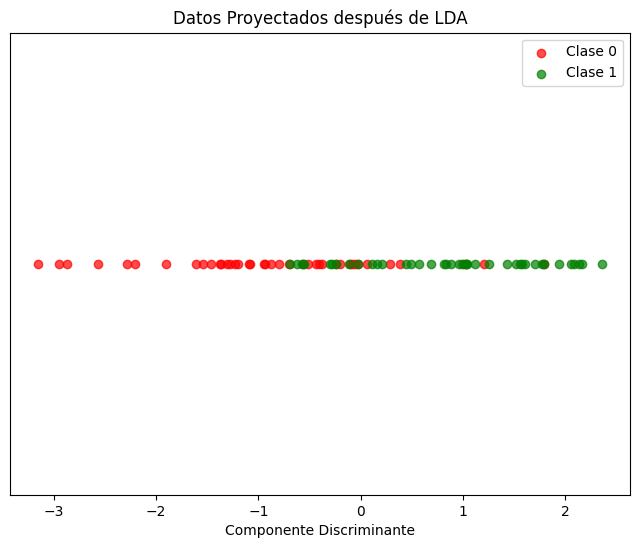

In [176]:
X_lda = lda.transform(X12)

colors = ['r', 'g']

plt.figure(figsize=(8, 6))


for i, color in zip(np.unique(y12), colors):
    plt.scatter(X_lda[y12.ravel() == i, 0], np.zeros_like(X_lda[y12.ravel() == i, 0]),
                color=color, alpha=0.7, label=f'Clase {int(i)}')


plt.xlabel('Componente Discriminante')
plt.title('Datos Proyectados después de LDA')
plt.legend(loc='best')

plt.gca().get_yaxis().set_visible(False)

plt.show()


El uso de LDA supone encontrar una transformación lineal de los datos originales de tal manera de poder maximizar la distancia entre clases en el nuevo espacio, para esto se calculan vectores propios que identifican la dirección óptima de la separación de clases para luego proyectarlos en la dirección calculada, esto con la finalidad de reducir la complejidad al proceso de clasificación al reducir la dimensionalidad de los datos.

Realizadas varias pruebas (ya que cada vez que se ejecuta el código se generan nuevas combinaciones de elementos) he obtenido variadas respuestas, algunas en las que los puntos se sobreponen otras en las que la distancia es mayor y aglutina los elementos en líneas más cortas no obstante me resulta complejo hacer una interpretación más detallada pues los valores con los cuales trabajamos no tienen ningún sentido más que el azar.

Por otra parte hay elementos en el ejercicio que no logré enteder su finalidad por ejemplo la función *def centering(n)* o el porque se generan 120 elementos en tres grupos que son los que se muestran en el primer gráfico pero luego se utiliza una nueva combinación que solo considera los primeros dos grupos (X12 = X1 y X2).  En ese sentido, se hace más difícil la interpretación ya que se tiene un elemento distractor dentro de la data.

### 3.2 En este segmento se usan todos los datos (X, etiquetas)

In [177]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Crear una instancia del modelo LDA
lda1 = LinearDiscriminantAnalysis()

# Ajustar el modelo a los datos
lda1.fit(X, etiquetas.ravel())

# Obtener la matriz de proyección óptima
W_sklearn1 = lda.scalings_

print("Matriz de proyección óptima con scikit-learn:")
print(W_sklearn1)

Matriz de proyección óptima con scikit-learn:
[[-0.93603921]
 [ 0.83981833]]


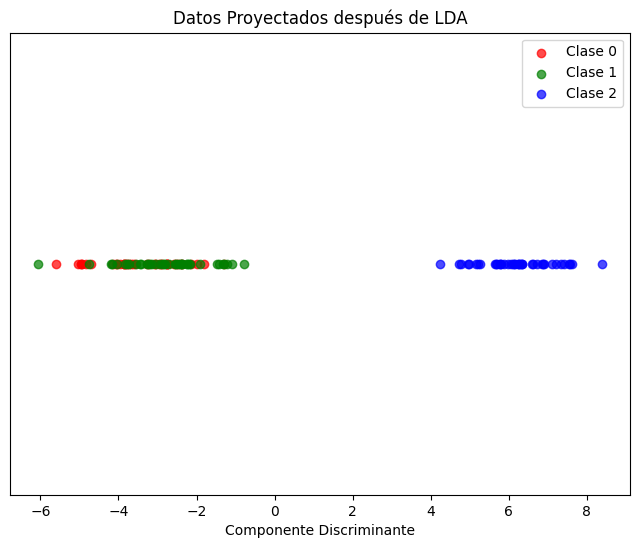

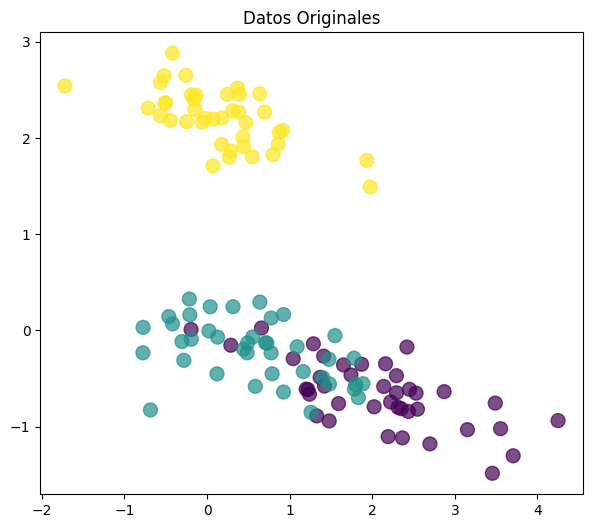

In [178]:
X_lda1 = lda1.transform(X)

colors = ['r', 'g', 'b']

plt.figure(figsize=(8, 6))


for i, color in zip(np.unique(etiquetas), colors):
    plt.scatter(X_lda1[etiquetas.ravel() == i, 0], np.zeros_like(X_lda1[etiquetas.ravel() == i, 0]),
                color=color, alpha=0.7, label=f'Clase {int(i)}')


plt.xlabel('Componente Discriminante')
plt.title('Datos Proyectados después de LDA')
plt.legend(loc='best')

plt.gca().get_yaxis().set_visible(False)

plt.show()

fig = plt.figure(figsize=(7, 6))
plt.scatter(X[:,0], X[:,1], s=100, c=etiquetas, alpha=0.7, cmap=plt.cm.viridis)
plt.title('Datos Originales')
plt.show()

PD.- He incluido el proceso de Analisis Lineal de Discriminacion para todo el dataset con la finalidad de entender mejor de que manera funciona este algoritmo de clasificación comparándolo con la data original.  En este sentido puedo interpretar que este algoritmo es útil en casos en la data original está bien delimitada y no existe superposición en los datos ya que al reducir la distribución de los elementos en una plano lineal existe riesgo que estos se sobrepongan entre ellos haciendo poco eficiente la clasificación o confundiendo límites entre los distintos grupos.  De cierta manera el método se autolimita al reducir la dimensionalidad de la proyección en vectores propios.

## Parte II (Clusterización)

**1. Reanalice su datos y obtenga 2 y 3 cluster.**

**2. Concluya lo obtenido y grafique lo pedido en 1.**

### 2.1 En esta parte uso los datos de la concatenación X12 en la que se elimina una clase

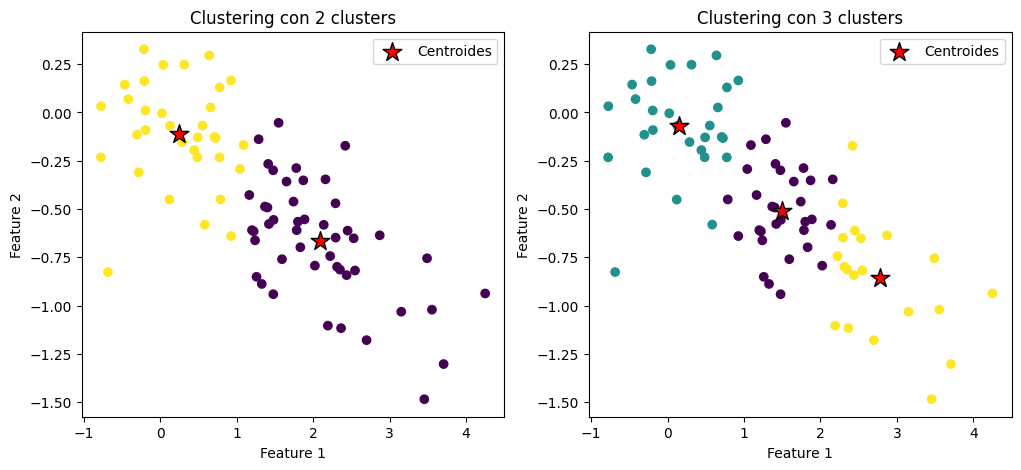

In [179]:
from sklearn.cluster import KMeans

kmeans_2 = KMeans(n_clusters=2)
clusters_2 = kmeans_2.fit_predict(X12)

kmeans_3 = KMeans(n_clusters=3)
clusters_3 = kmeans_3.fit_predict(X12)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X12[:, 0], X12[:, 1], c=clusters_2, cmap='viridis')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1],
            marker='*', s=200, color='red', edgecolor='black', label='Centroides')
plt.title('Clustering con 2 clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X12[:, 0], X12[:, 1], c=clusters_3, cmap='viridis')
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:, 1],
            marker='*', s=200, color='red', edgecolor='black', label='Centroides')
plt.title('Clustering con 3 clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.show()

### 2.2 En esta parte hago uso de los datos originales X

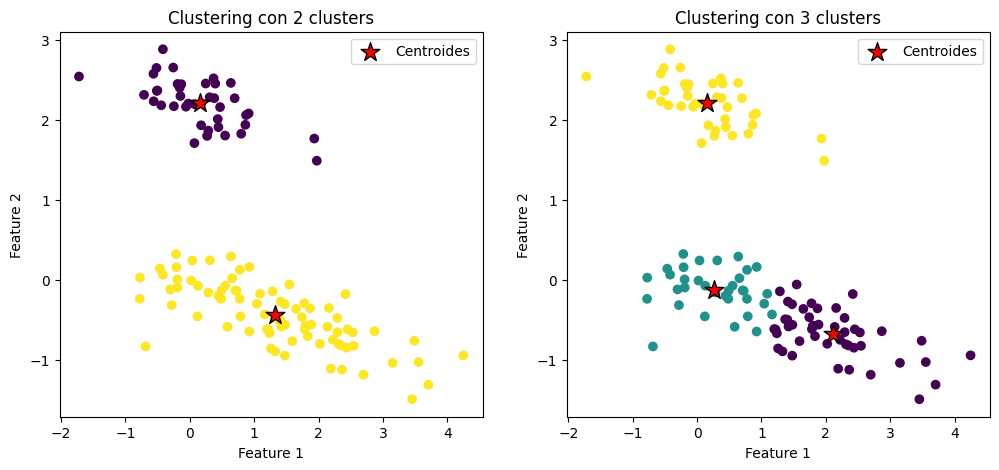

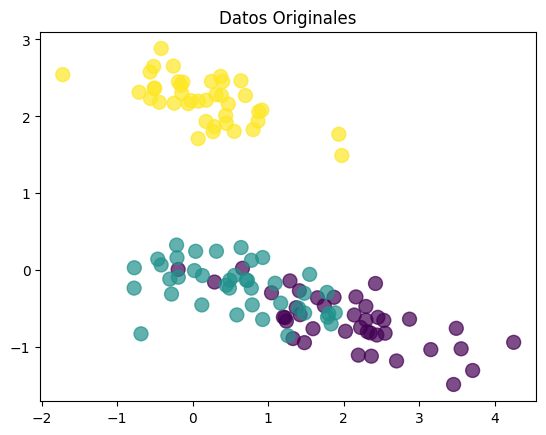

In [180]:
kmeans2_2 = KMeans(n_clusters=2)
clusters2_2 = kmeans2_2.fit_predict(X)

kmeans2_3 = KMeans(n_clusters=3)
clusters2_3 = kmeans2_3.fit_predict(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=clusters2_2, cmap='viridis')
plt.scatter(kmeans2_2.cluster_centers_[:, 0], kmeans2_2.cluster_centers_[:, 1],
            marker='*', s=200, color='red', edgecolor='black', label='Centroides')
plt.title('Clustering con 2 clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clusters2_3, cmap='viridis')
plt.scatter(kmeans2_3.cluster_centers_[:, 0], kmeans2_3.cluster_centers_[:, 1],
            marker='*', s=200, color='red', edgecolor='black', label='Centroides')
plt.title('Clustering con 3 clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()


plt.show()

fig = plt.figure()
plt.scatter(X[:,0], X[:,1], s=100, c=etiquetas, alpha=0.7, cmap=plt.cm.viridis)
plt.title('Datos Originales')
plt.show()

Realizado el análisis con un método de clusterización podemos observar un resultado más claro en cuanto a las diferencias entre grupos aún cuando la data original esté superpuesta, esto debido a que el algoritmo de K-means segrega por distancia media respecto a los centroides asignando a cada elemento la categorización respecto esta medida de distancia sin transformar los datos originales o modificarlos para una proyección en una dimensión diferente.

Por otra parte, el LDA de Fisher, es más rígido en cuanto a que la data original teniendo como objetivo buscar la manera de maximizar la distancia entre las clases pero manteniendo sus categorías, en cambio la clusterización mediante el algoritmo K-means es más flexible en ese sentido ya que puede reasignar elementos de una misma clase (original) a un clúster en el que perfectamente puedan coexistir elementos de las distintas clases haciendo más uniforme y visualmente mejor presentado el resultado.

Resulta muy útil para la interpretación, comparar todos los graficos con el gráfico original.